In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import logging
tf.get_logger().setLevel(logging.ERROR)
import os

In [14]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=_URL,extract=True)
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/home/shadow-man/.keras/datasets
/home/shadow-man/.keras/datasets/cats_and_dogs_filtered
/home/shadow-man/.keras/datasets/cats_and_dogs_filtered/validation
/home/shadow-man/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/home/shadow-man/.keras/datasets/cats_and_dogs_filtered/validation/cats
/home/shadow-man/.keras/datasets/cats_and_dogs_filtered/train
/home/shadow-man/.keras/datasets/cats_and_dogs_filtered/train/dogs
/home/shadow-man/.keras/datasets/cats_and_dogs_filtered/train/cats
/home/shadow-man/.keras/datasets/fashion-mnist


In [15]:
base_dir = os.path.join(zip_dir_base,'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
print(base_dir)

/home/shadow-man/.keras/datasets/cats_and_dogs_filtered


In [16]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
num_tr = num_cats_tr + num_dogs_tr
num_val = num_cats_val + num_dogs_val
print(num_tr,num_val)

2000 1000


In [17]:
BATCH_SIZE = 100
IMG_SIZE = 150
train_image_generator = ImageDataGenerator(rescale = 1./255)
val_image_generator = ImageDataGenerator(rescale = 1./255)


In [18]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                          shuffle=True,
                                                          directory = train_dir,
                                                          target_size=(IMG_SIZE,IMG_SIZE),
                                                          class_mode='binary')
val_data_gen = val_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                      target_size = (IMG_SIZE,IMG_SIZE),
                                                      shuffle = False,
                                                      directory=validation_dir)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
sample_training_images, _ = next(train_data_gen)

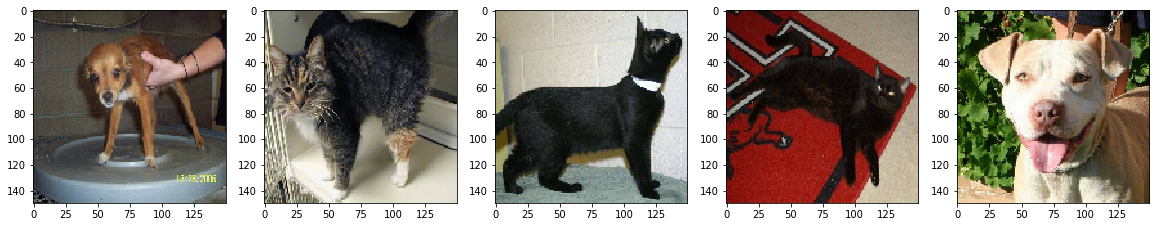

In [20]:
def plot_images(images_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
#     plt.tight_layout()
    plt.show()
plot_images(sample_training_images)

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
             metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [28]:
EPOCHS = 2
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(num_tr/float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(num_val/float(BATCH_SIZE)))    
)
#This is taking some serious time lol      

Epoch 1/2
 1/20 [>.............................] - ETA: 12:53 - loss: 0.6931 - accuracy: 0.4300

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt

